# **Analysis - Investment Requirement Analysis**

In this section, we'll conduct the three types of analyses - funding type, country analysis, and sector analysis.

## **Funding Type Analysis**

Let's compare the funding amounts across the funding types. Also, we need to impose the constraint that the investment amount should be between 5 and 15 million USD. We will choose the funding type such that the average investment amount falls in this range.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving master_df.csv to master_df.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("master_df.csv", sep=",", encoding="ISO-8859-1")
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
3,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


In [3]:
# first, let's filter the df so it only contains the four specified funding types
df = df[(df.funding_round_type == "venture") | 
        (df.funding_round_type == "angel") | 
        (df.funding_round_type == "seed") | 
        (df.funding_round_type == "private_equity") ]

Now, we have to compute a **representative value of the funding amount** for each type of invesstment. We can either choose the mean or the median - let's have a look at the distribution of ```raised_amount_usd``` to get a sense of the distribution of data.

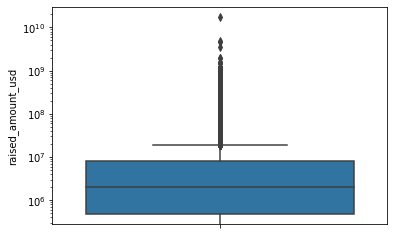

In [4]:
# distribution of raised_amount_usd
sns.boxplot(y=df['raised_amount_usd'])
plt.yscale('log')
plt.show()

Let's also look at the summary metrics.

In [5]:
# summary metrics
df['raised_amount_usd'].describe()

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

Note that there's a significant difference between the mean and the median - USD 9.5m and USD 2m. Let's also compare the summary stats across the four categories.

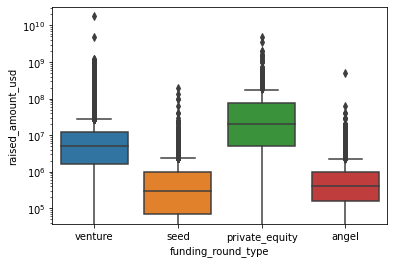

In [6]:
# comparing summary stats across four categories
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=df)
plt.yscale('log')
plt.show()

In [7]:
# compare the mean and median values across categories
df.pivot_table(values='raised_amount_usd', columns='funding_round_type', aggfunc=[np.median, np.mean])

median                 ...           mean              
funding_round_type     angel private_equity  ...           seed       venture
raised_amount_usd   414906.0     20000000.0  ...  747793.682484  1.172422e+07

[1 rows x 8 columns]

Note that there's a large difference between the mean and the median values for all four types. For type venture, for e.g. the median is about 20m while the mean is about 70m. 

Thus, the choice of the summary statistic will drastically affect the decision (of the investment type). Let's choose median, since there are quite a few extreme values pulling the mean up towards them - but they are not the most 'representative' values.

In [8]:
# compare the median investment amount across the types
df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

The median investment amount for type 'private_equity' is approx. USD 20m, which is beyond Teclov' range of 5-15m. The median of 'venture' type is about USD 5m, which is suitable for them. The average amounts of angel and seed types are lower than their range.

Thus, 'venture' type investment will be most suited to them.

## **Country Analysis**

Let's now compare the total investment amounts across countries. Note that we'll filter the data for only the 'venture' type investments and then compare the 'total investment' across countries.

In [9]:
# filter the df for private equity type investments
df = df[df.funding_round_type=="venture"]

# group by country codes and compare the total funding amounts
country_wise_total = df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
print(country_wise_total)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
           ...     
MCO    6.570000e+05
SAU    5.000000e+05
CMR    3.595610e+05
GTM    3.000000e+05
MMR    2.000000e+05
Name: raised_amount_usd, Length: 97, dtype: float64


Let's now extract the top 9 countries from ```country_wise_total```.

In [10]:
# top 9 countries
top_9_countries = country_wise_total[:9]
top_9_countries

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

Among the top 9 countries, USA, GBR and IND are the top three English speaking countries. Let's filter the dataframe so it contains only the top 3 countries.

In [11]:
# filtering for the top three countries
df = df[(df.country_code=='USA') | (df.country_code=='GBR') | (df.country_code=='IND')]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0


After filtering for 'venture' investments and the three countries USA, Great Britain and India, the filtered df looks like this.

In [12]:
# filtered df has about 38800 observations
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 88518
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                38803 non-null  object 
 1   name                     38803 non-null  object 
 2   category_list            38803 non-null  object 
 3   status                   38803 non-null  object 
 4   country_code             38803 non-null  object 
 5   funding_round_permalink  38803 non-null  object 
 6   funding_round_type       38803 non-null  object 
 7   funded_at                38803 non-null  object 
 8   raised_amount_usd        38803 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.0+ MB


One can visually analyse the distribution and the total values of funding amount.

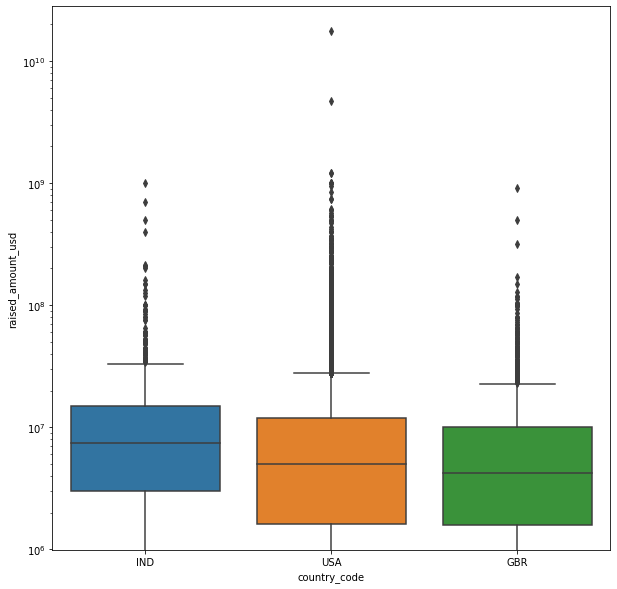

In [13]:
# boxplot to see distributions of funding amount across countries
plt.figure(figsize=(10, 10))
sns.boxplot(x='country_code', y='raised_amount_usd', data=df)
plt.yscale('log')
plt.show()

Now, we have shortlisted the investment type (venture) and the three countries. Let's now choose the sectors.

## **Sector Analysis**


First, we need to extract the main sector using the column ```category_list```. The category_list column contains values such as 'Biotechnology|Health Care' - in this, 'Biotechnology' is the 'main category' of the company, which we need to use.

Let's extract the main categories in a new column.

In [14]:
# extracting the main category
df.loc[:, 'main_category'] = df['category_list'].apply(lambda x: x.split("|")[0])
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


We can now drop the ```category_list``` column.

In [15]:
# drop the category_list column
df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


Now, we'll read the ```mapping.csv``` file and merge the main categories with its corresponding column.

In [17]:
from google.colab import files
uploaded = files.upload()

Saving mapping.csv to mapping.csv


In [18]:
# read mapping file
mapping = pd.read_csv("mapping.csv", sep=",")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


Firstly, let's get rid of the missing values since we'll not be able to merge those rows anyway.

In [19]:
# missing values in mapping file
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [20]:
# remove the row with missing values
mapping = mapping[~pd.isnull(mapping['category_list'])]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

Now, since we need to merge the mapping file with the main dataframe (df), let's convert the common column to lowercase in both.

In [21]:
# converting common columns to lowercase
mapping['category_list'] = mapping['category_list'].str.lower()
df['main_category'] = df['main_category'].str.lower()

In [22]:
# look at heads
print(mapping.head())

      category_list  ...  Social, Finance, Analytics, Advertising
1                3d  ...                                        0
2       3d printing  ...                                        0
3     3d technology  ...                                        0
4        accounting  ...                                        1
5  active lifestyle  ...                                        0

[5 rows x 10 columns]


In [23]:
print(df.head())

                     permalink          name  ... raised_amount_usd main_category
0          /organization/-fame         #fame  ...        10000000.0         media
7         /organization/0xdata        H2O.ai  ...        20000000.0     analytics
8         /organization/0xdata        H2O.ai  ...         1700000.0     analytics
9         /organization/0xdata        H2O.ai  ...         8900000.0     analytics
15  /organization/1-mainstream  1 Mainstream  ...         5000000.0          apps

[5 rows x 9 columns]


Let's have a look at the ```category_list``` column of the mapping file. These values will be used to merge with the main df.

In [24]:
mapping['category_list']

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
683           wholesale
684    wine and spirits
685            wireless
686               women
687        young adults
Name: category_list, Length: 687, dtype: object

To be able to merge all the ```main_category``` values with the mapping file's ```category_list``` column, all the values in the  ```main_category``` column should be present in the ```category_list``` column of the mapping file.

Let's see if this is true.

In [25]:
# values in main_category column in df which are not in the category_list column in mapping file
df[~df['main_category'].isin(mapping['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
47,/organization/100plus,100Plus,acquired,USA,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,analytics
136,/organization/1world-online,1World Online,operating,USA,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.0,analytics
...,...,...,...,...,...,...,...,...,...
88270,/organization/zoopla,Zoopla,ipo,GBR,/funding-round/98da1f441a55c9a9629a256828923e38,venture,19-01-2009,5440000.0,property management
88291,/organization/zopa,Zopa,operating,GBR,/funding-round/2a55d435c3433d8f903526c050c19361,venture,20-03-2007,12900000.0,finance
88292,/organization/zopa,Zopa,operating,GBR,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,01-03-2006,15000000.0,finance
88293,/organization/zopa,Zopa,operating,GBR,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,venture,01-07-2006,5000000.0,finance


Notice that values such as 'analytics', 'business analytics', 'finance', 'nanatechnology' etc. are not present in the mapping file.

Let's have a look at the values which are present in the mapping file but not in the main dataframe df.

In [26]:
# values in the category_list column which are not in main_category column 
mapping[~mapping['category_list'].isin(df['main_category'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
670,virtual workforces,0,0,0,1,0,0,0,0,0
672,waste ma0gement,0,0,1,0,0,0,0,0,0
682,weddings,0,0,0,1,0,0,0,0,0
683,wholesale,0,0,0,0,0,0,0,1,0


If you see carefully, you'll notice something fishy - there are sectors named *alter0tive medicine*, *a0lytics*, *waste ma0gement*, *veteri0ry*, etc. This is not a *random* quality issue, but rather a pattern. In some strings, the 'na' has been replaced by '0'. This is weird - maybe someone was trying to replace the 'NA' values with '0', and ended up doing this. 

Let's treat this problem by replacing '0' with 'na' in the ```category_list``` column.

In [27]:
# replacing '0' with 'na'
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0', 'na'))
print(mapping['category_list'])

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
683           wholesale
684    wine and spirits
685            wireless
686               women
687        young adults
Name: category_list, Length: 687, dtype: object


This looks fine now. Let's now merge the two dataframes.

In [28]:
# merge the dfs
df = pd.merge(df, mapping, how='inner', left_on='main_category', right_on='category_list')
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,media,0,0,0,1,0,0,0,0,0


In [29]:
# let's drop the category_list column since it is the same as main_category
df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,0,0,0,1,0,0,0,0,0


In [30]:
# look at the column types and names
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   permalink                                38788 non-null  object 
 1   name                                     38788 non-null  object 
 2   status                                   38788 non-null  object 
 3   country_code                             38788 non-null  object 
 4   funding_round_permalink                  38788 non-null  object 
 5   funding_round_type                       38788 non-null  object 
 6   funded_at                                38788 non-null  object 
 7   raised_amount_usd                        38788 non-null  float64
 8   main_category                            38788 non-null  object 
 9   Automotive & Sports                      38788 non-null  int64  
 10  Blanks                                   38788

### **Converting the 'wide' dataframe to 'long'**

You'll notice that the columns representing the main category in the mapping file are originally in the 'wide' format - Automotive & Sports, Cleantech / Semiconductors etc.

They contain the value '1' if the company belongs to that category, else 0. This is quite redundant. We can as well have a column named 'sub-category' having these values. 

Let's convert the df into the long format from the current wide format. First, we'll store the 'value variables' (those which are to be melted) in an array. The rest will then be the 'index variables'.

In [31]:
help(pd.melt)

Help on function melt in module pandas.core.reshape.melt:

melt(frame: 'DataFrame', id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index: bool = True) -> 'DataFrame'
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    
    Parameters
    ----------
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' column. If None it uses
        ``fram

In [32]:
# store the value and id variables in two separate arrays

# store the value variables in one Series
value_vars = df.columns[9:18]

# take the setdiff() to get the rest of the variables
id_vars = np.setdiff1d(df.columns, value_vars)

print(value_vars, "\n")
print(id_vars)

Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object') 

['country_code' 'funded_at' 'funding_round_permalink' 'funding_round_type'
 'main_category' 'name' 'permalink' 'raised_amount_usd' 'status']


In [33]:
# convert into long
long_df = pd.melt(df, 
        id_vars=list(id_vars), 
        value_vars=list(value_vars))

long_df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable,value
0,IND,05-01-2015,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,media,#fame,/organization/-fame,10000000.0,operating,Automotive & Sports,0
1,GBR,06-10-2015,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,media,90min,/organization/90min,15000000.0,operating,Automotive & Sports,0
2,GBR,07-05-2013,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,media,90min,/organization/90min,5800000.0,operating,Automotive & Sports,0
3,GBR,26-03-2014,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,media,90min,/organization/90min,18000000.0,operating,Automotive & Sports,0
4,USA,06-08-2014,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,media,All Def Digital,/organization/all-def-digital,5000000.0,operating,Automotive & Sports,0


We can now get rid of the rows where the column 'value' is 0 and then remove that column altogether.

In [34]:
# remove rows having value=0
long_df = long_df[long_df['value']==1]
long_df = long_df.drop('value', axis=1)

In [35]:
# look at the new df
long_df.head()
len(long_df)

38788

In [36]:
# renaming the 'variable' column
long_df = long_df.rename(columns={'variable': 'sector'})

In [37]:
# info
long_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 25828 to 349075
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country_code             38788 non-null  object 
 1   funded_at                38788 non-null  object 
 2   funding_round_permalink  38788 non-null  object 
 3   funding_round_type       38788 non-null  object 
 4   main_category            38788 non-null  object 
 5   name                     38788 non-null  object 
 6   permalink                38788 non-null  object 
 7   raised_amount_usd        38788 non-null  float64
 8   status                   38788 non-null  object 
 9   sector                   38788 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.3+ MB


The dataframe now contains only venture type investments in countries USA, IND and GBR, and we have mapped each company to one of the eight main sectors (named 'sector' in the dataframe). 

We can now compute the sector-wise number and the amount of investment in the three countries.

In [38]:
# summarising the sector-wise number and sum of venture investments across three countries

# first, let's also filter for investment range between 5 and 15m
df = long_df[(long_df['raised_amount_usd'] >= 5000000) & (long_df['raised_amount_usd'] <= 15000000)]

In [39]:
# groupby country, sector and compute the count and sum
df.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])

count           sum
country_code sector                                                      
GBR          Automotive & Sports                         16  1.670516e+08
             Cleantech / Semiconductors                 130  1.163990e+09
             Entertainment                               56  4.827847e+08
             Health                                      24  2.145375e+08
             Manufacturing                               42  3.619403e+08
             News, Search and Messaging                  73  6.157462e+08
             Others                                     147  1.283624e+09
             Social, Finance, Analytics, Advertising    133  1.089404e+09
IND          Automotive & Sports                         13  1.369000e+08
             Cleantech / Semiconductors                  20  1.653800e+08
             Entertainment                               33  2.808300e+08
             Health                                      19  1.677400e+08
             Manufacturing                               21  2.009000e+08
             News, Search and Messaging                  52  4.338345e+08
             Others                                     110  1.013410e+09
             Social, Finance, Analytics, Advertising     60  5.505496e+08
USA          Automotive & Sports                        167  1.454104e+09
             Cleantech / Semiconductors                2350  2.163343e+10
             Entertainment                              591  5.099198e+09
             Health                                     909  8.211859e+09
             Manufacturing                              799  7.258553e+09
             News, Search and Messaging                1583  1.397157e+10
             Others                                    2950  2.632101e+10
             Social, Finance, Analytics, Advertising   2714  2.380738e+10

This will be much more easy to understand using a plot.

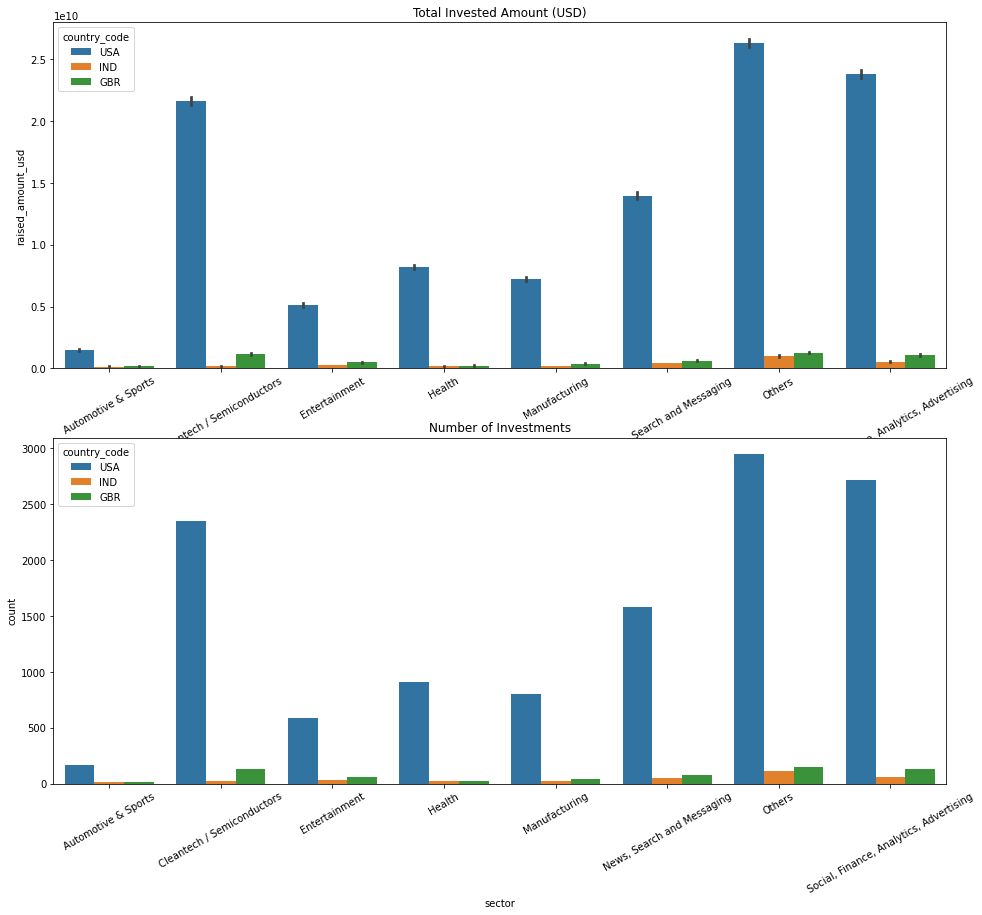

In [40]:
# plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 1)
p = sns.barplot(x='sector', y='raised_amount_usd', hue='country_code', data=df, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD)')

plt.subplot(2, 1, 2)
q = sns.countplot(x='sector', hue='country_code', data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments')


plt.show()

Thus, the top country in terms of the number of investments (and the total amount invested) is the USA. The sectors 'Others', 'Social, Finance, Analytics and Advertising' and 'Cleantech/Semiconductors' are the most heavily invested ones.

In case you don't want to consider 'Others' as a sector, 'News, Search and Messaging' is the next best sector.